In [1]:
import pandas as pd
import numpy

In [2]:
training_metrics = {
    "Epoch": [1, 2, 3],
    "Training Loss": [0.1256, 0.1022, 0.0678],
    "Validation Loss": [0.135535, 0.118114, 0.108424],
    "Accuracy": [0.963238, 0.971784, 0.974683]
}

metrics_df = pd.DataFrame(training_metrics)
metrics_df

,Epoch,Training Loss,Validation Loss,Accuracy
0,1,0.1256,0.135535,0.963238
1,2,0.1022,0.118114,0.971784
2,3,0.0678,0.108424,0.974683


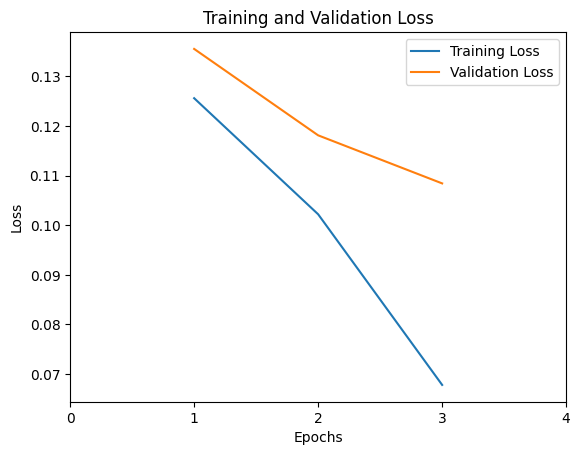

In [7]:
from pickle import load
from matplotlib.pylab import plt
from numpy import arange

# Retrieve each dictionary's values
train_values = metrics_df['Training Loss'].values
val_values = metrics_df['Validation Loss'].values
 
# Generate a sequence of integers to represent the epoch numbers
epochs = range(1, 4)
 
# Plot and label the training and validation loss values
plt.plot(epochs, train_values, label='Training Loss')
plt.plot(epochs, val_values, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, 5, 1))
 
# Display the plot
plt.legend(loc='best')
plt.show()

In [ ]:
from pickle import load
from matplotlib.pylab import plt
from numpy import arange

# Retrieve each dictionary's values
train_values = metrics_df['Training Loss'].values
val_values = metrics_df['Validation Loss'].values
 
# Generate a sequence of integers to represent the epoch numbers
epochs = range(1, 4)
 
# Plot and label the training and validation loss values
plt.plot(epochs, train_values, label='Training Loss')
plt.plot(epochs, val_values, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, 5, 1))
 
# Display the plot
plt.legend(loc='best')
plt.show()